In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn


#ISO-8859-1
#latin-1
sdata = pandas.read_csv('/Users/kevinruiz/Documents/GitHub/HTH-2023-Spotify-Data-Analysis/Data/Spotify-2023.csv',encoding='ISO-8859-1')
sdata = sdata.drop([0, 574])
sdata['streams'] = pandas.to_numeric(sdata['streams'],errors='coerce')

# 1. What were the top 10 most streamed tracks from the 90's in 2023? And plot their streams in a bar graph.


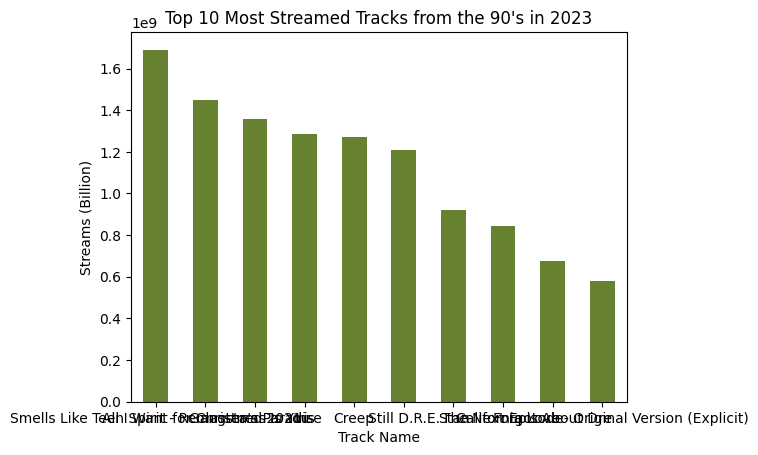

In [2]:
nineties_tracks = sdata[(sdata['released_year'] >= 1990)&(sdata['released_year']<=1999)]

sorted = nineties_tracks.sort_values('streams',ascending = False).iloc[1:11]

seaborn.barplot(x= sorted['track_name'], y=sorted['streams'],color = 'olivedrab', width = 0.5, dodge=False).set(title="Top 10 Most Streamed Tracks from the 90's in 2023", xlabel='Track Name', ylabel='Streams (Billion)')
plt.rcParams["figure.figsize"] = (18,9)

# 2. How Popular were Ed Sheran's Top 6 Songs of 2023 compared? Create a pie chart comparing them.

Text(0.5, 1.0, "Ed Sheran's Top 6 Songs and their Popularity in 2023")

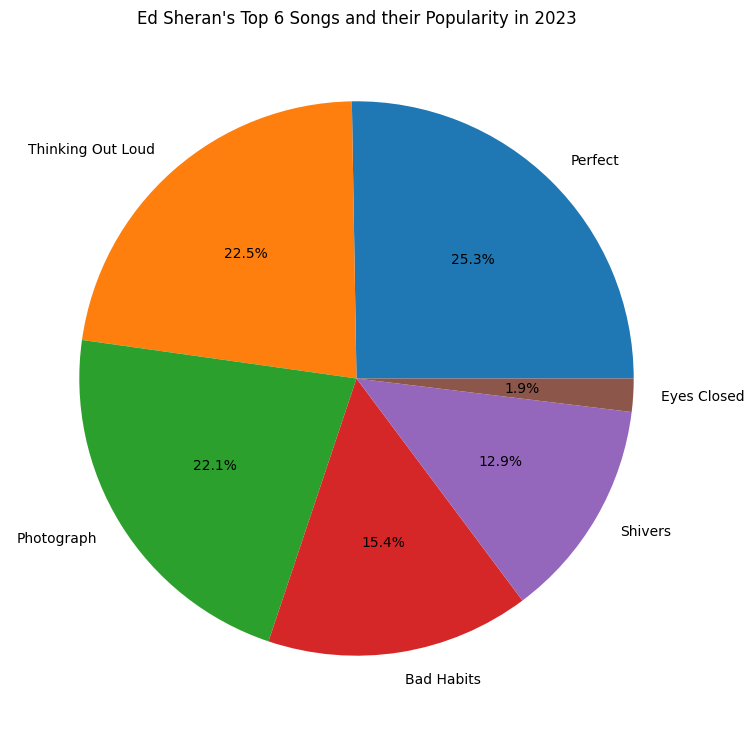

In [3]:
### 2. How much percent did each of Ed Sheran's Top Songs contribute to his total streams in 2023? Create a pie chart comparing all 6 of them. 

ed_sheran = sdata[(sdata['artist(s)_name'] == 'Ed Sheeran')].sort_values('streams',ascending = False).iloc[1:7]

plt.pie(ed_sheran['streams'], labels =ed_sheran['track_name'], autopct='%1.1f%%')

plt.title("Ed Sheran's Top 6 Songs and their Popularity in 2023")




# 3. Create a scatterplot showing how release date relates to total streams.

([<matplotlib.axis.XTick at 0x121e9e2d0>,
 [Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1920, 0, '1920'),
  Text(1930, 0, '1930'),
  Text(1940, 0, '1940'),
  Text(1950, 0, '1950'),
  Text(1960, 0, '1960'),
  Text(1970, 0, '1970'),
  Text(1980, 0, '1980'),
  Text(1990, 0, '1990'),
  Text(2000, 0, '2000'),
  Text(2010, 0, '2010'),
  Text(2020, 0, '2020')])

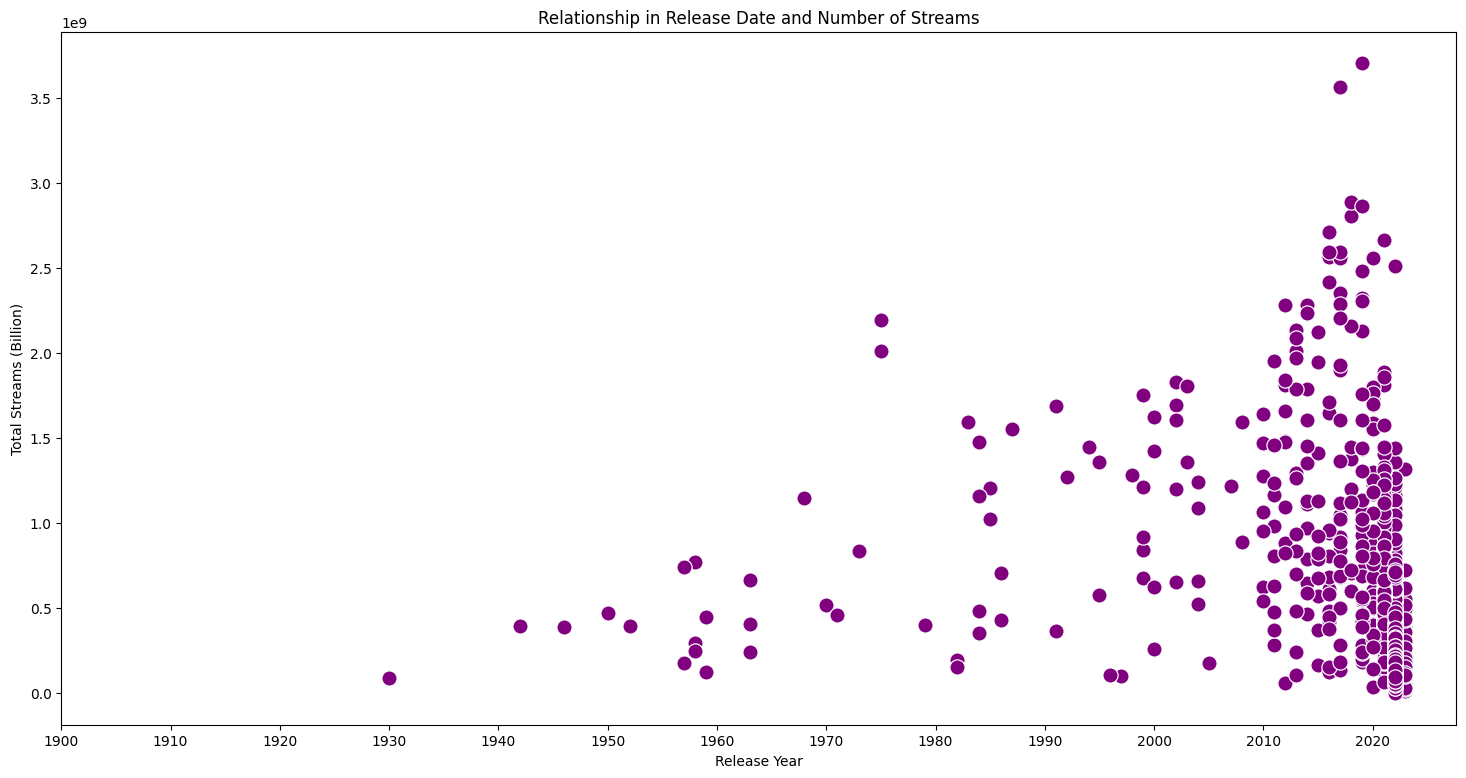

In [4]:
seaborn.scatterplot(x=sdata['released_year'], y=sdata['streams'],s = 120,color = 'Purple').set(title = 'Relationship in Release Date and Number of Streams',ylabel = 'Total Streams (Billion)',xlabel = 'Release Year')
plt.xticks(np.arange(1900, 2030, step=10))


# 4. Create a scatterplot comparing the bpm and streams.


[Text(0.5, 1.0, 'Relationship Bettween BPM and Total Streams'),
 Text(0.5, 0, 'BPM (Beats Per Minute)'),
 Text(0, 0.5, 'Streams (Billions)')]

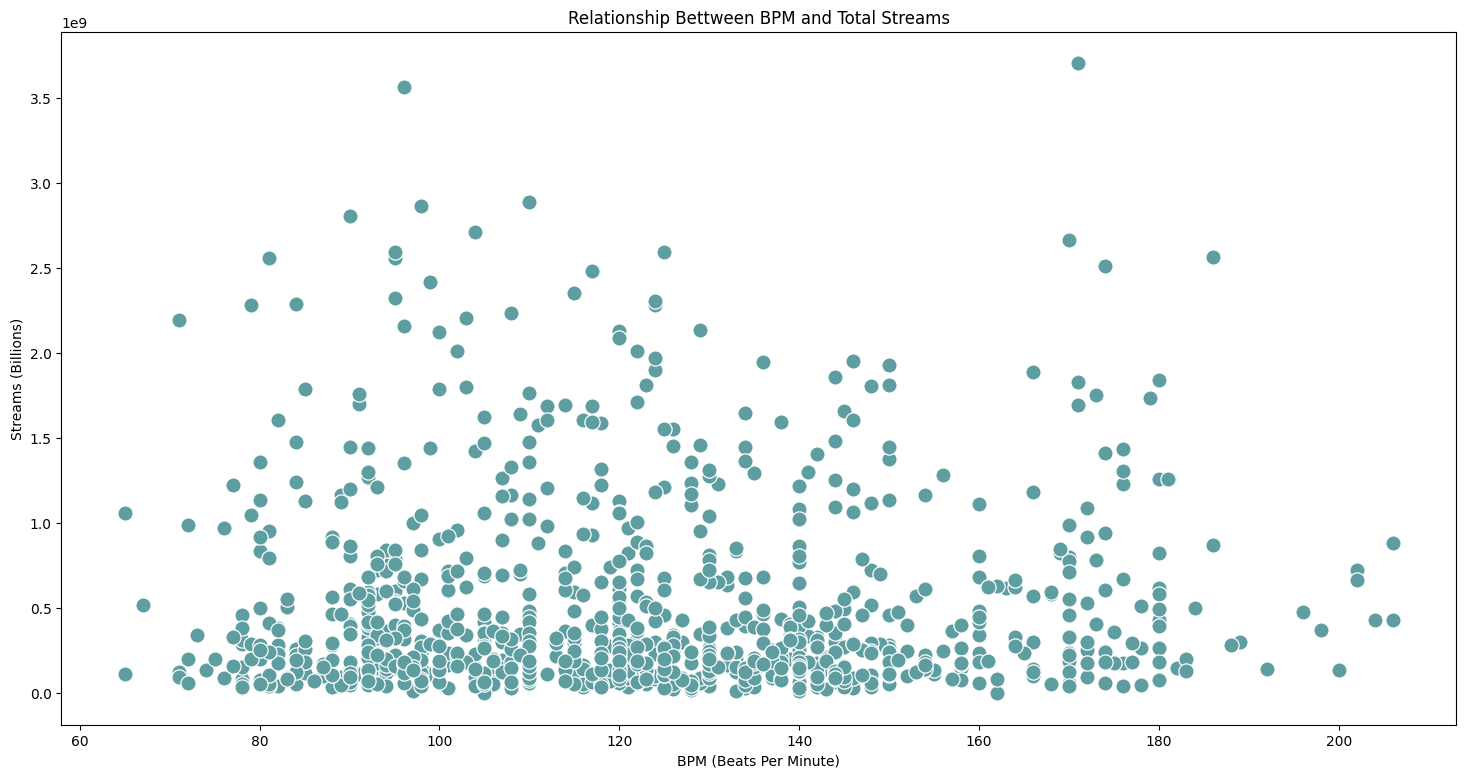

In [5]:
seaborn.scatterplot(x =sdata['bpm'], y=sdata['streams'],s = 120,color = 'cadetblue').set(title='Relationship Bettween BPM and Total Streams', xlabel='BPM (Beats Per Minute)',ylabel='Streams (Billions)')

# 5. How popular were the top 10 artists of 2023, compare each of them using a pie chart. 

The Top 10 Artists combined, made up 84618915612 (84 Billion) of Spotify's streams in 2023


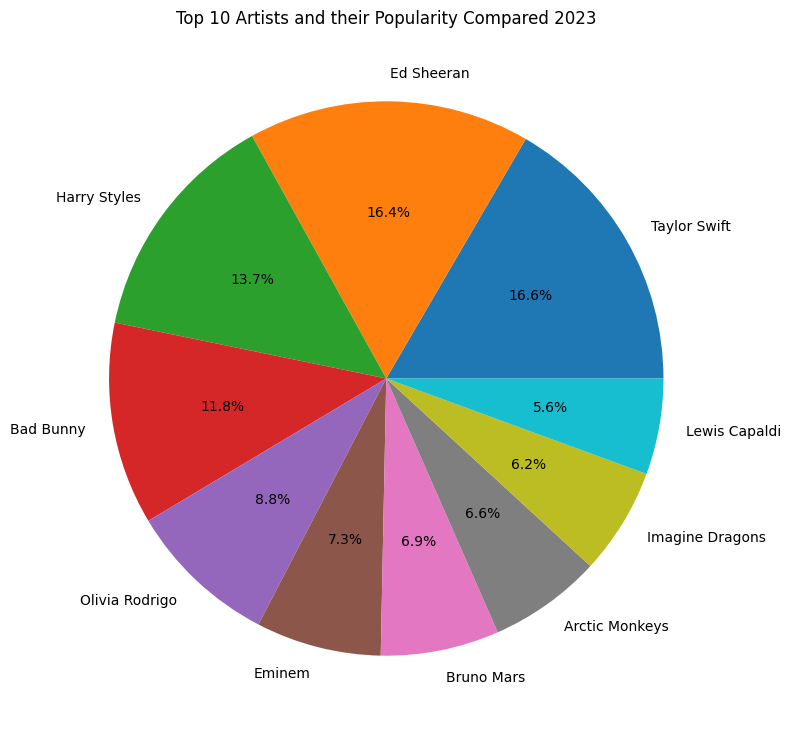

In [6]:
artists = sdata.groupby(['artist(s)_name']).sum().sort_values('streams',ascending = False).iloc[1:11]

plt.pie(artists['streams'], labels = artists.index,autopct='%1.1f%%')
plt.title("Top 10 Artists and their Popularity Compared 2023")

combined_streams = artists.streams.sum() 
print(f"The Top 10 Artists combined, made up {combined_streams} (84 Billion) of Spotify's streams in 2023")


# 6. Create a heatmap showing the correlation between associated track liveness, acousticness, energy ect.

[Text(0.5, 1.0, 'Correlation Between Track Parameters in 2023')]

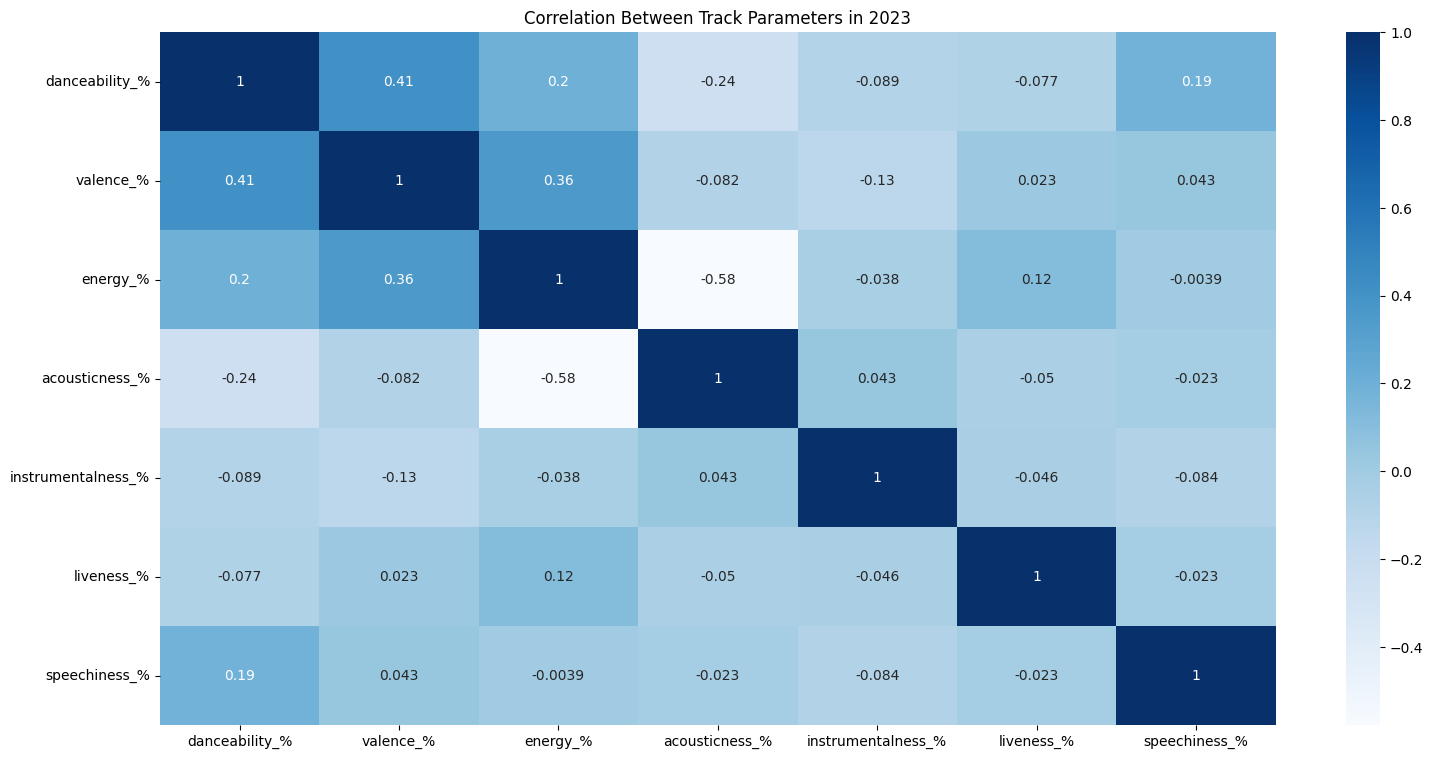

In [7]:
track_data = sdata.iloc[:, 17:]
seaborn.heatmap(track_data.corr(),annot = True,cmap = 'Blues').set(title= 'Correlation Between Track Parameters in 2023')

# 7. Create a line graph showing how Taylor Swift's older/newer tracks compare in popularity today. 

([<matplotlib.axis.XTick at 0x121e141a0>,
 [Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

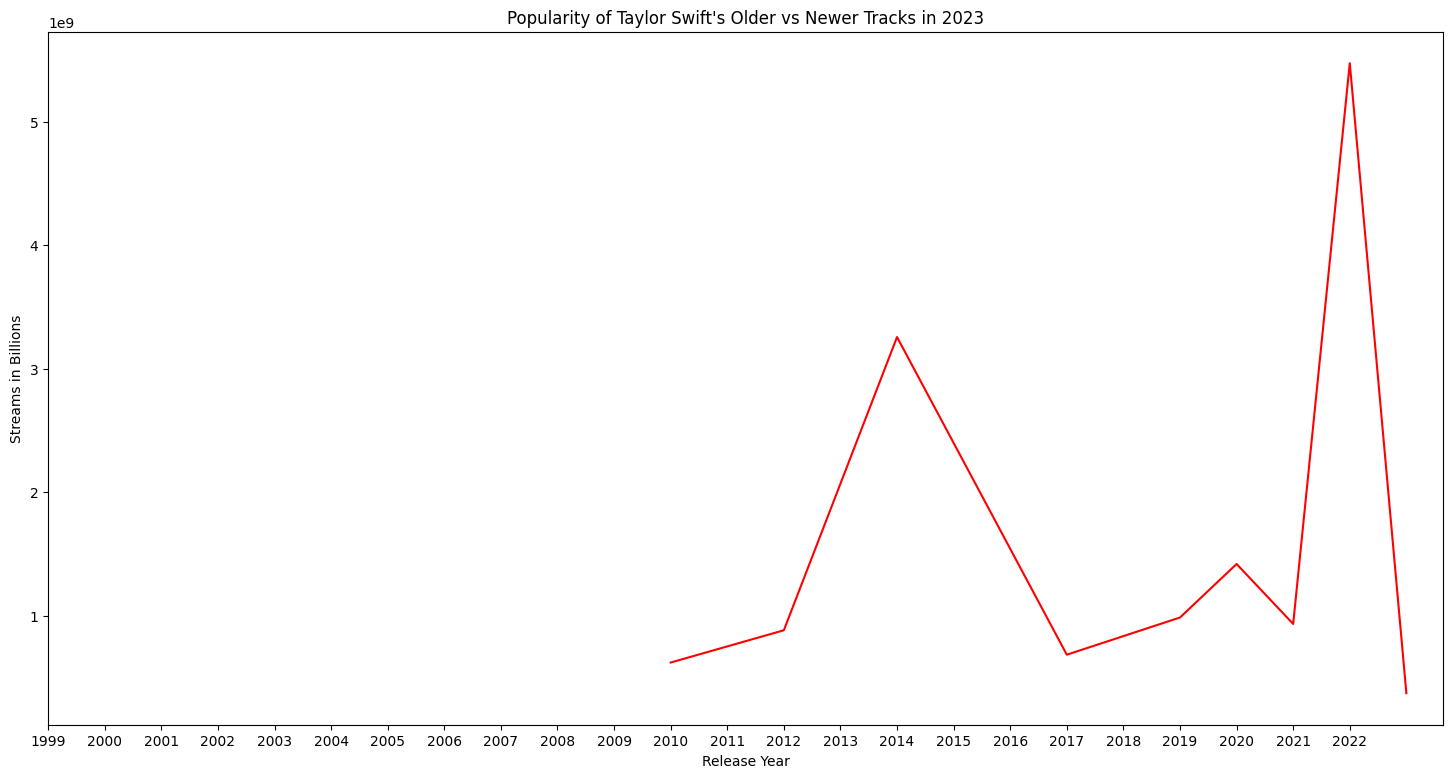

In [8]:
swifties = sdata[sdata['artist(s)_name'].str.contains('Taylor Swift')].sort_values('released_year').groupby('released_year').sum()
swifties

seaborn.lineplot(data=swifties, x= swifties.index, y='streams',color = 'Red').set(title = "Popularity of Taylor Swift's Older vs Newer Tracks in 2023",xlabel = 'Release Year',ylabel = 'Streams in Billions')
plt.xticks(np.arange(1999,swifties.index.max(), step=1))


# 8. Create a line graph showing how Eminems's older/newer tracks compare in popularity today. 

([<matplotlib.axis.XTick at 0x12217f890>,
 [Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

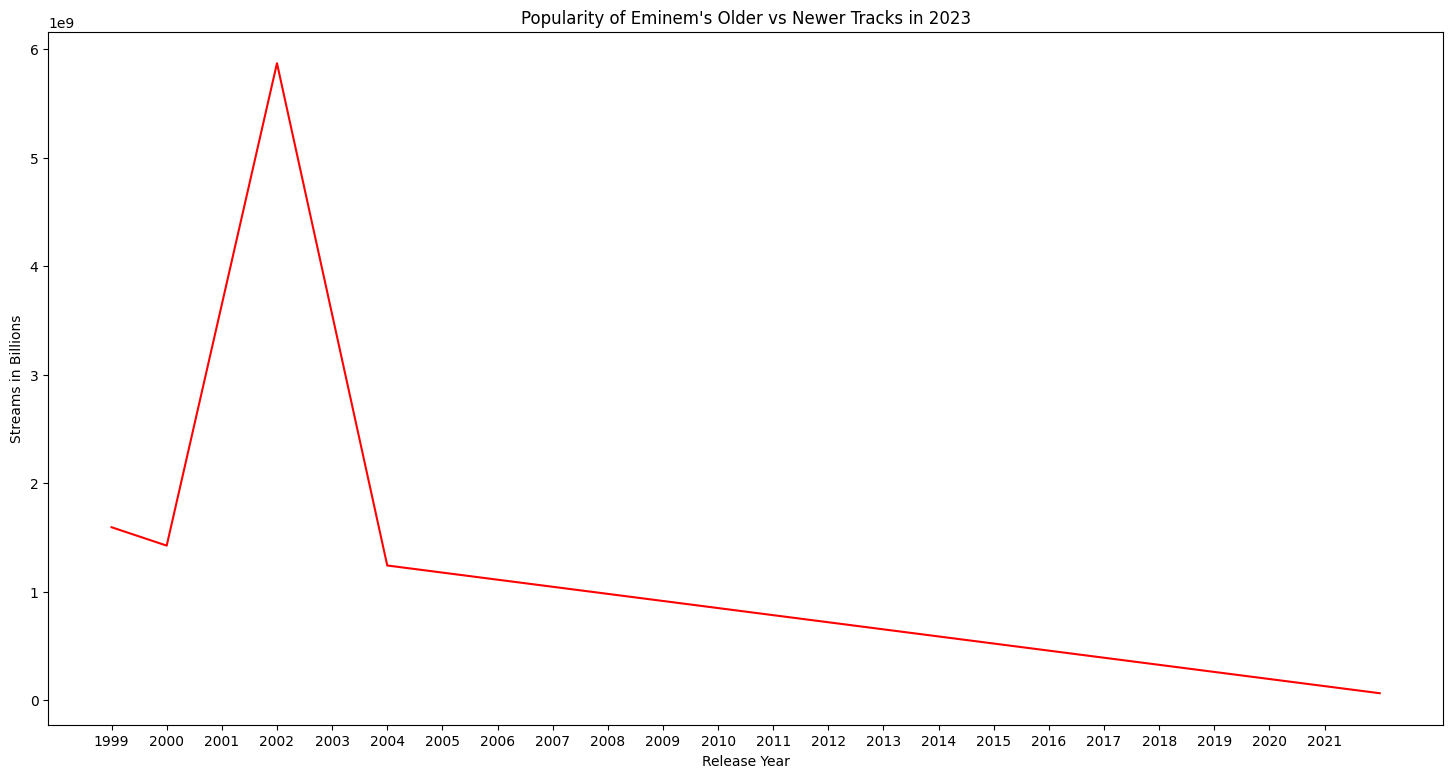

In [9]:
eminem = sdata[sdata['artist(s)_name'].str.contains('Eminem')].sort_values('released_year').groupby('released_year').sum()

seaborn.lineplot(data=eminem, x= eminem.index, y='streams',color = 'Red').set(title = "Popularity of Eminem's Older vs Newer Tracks in 2023",xlabel = 'Release Year',ylabel = 'Streams in Billions')
plt.xticks(np.arange(eminem.index.min(),eminem.index.max(), step=1))


# 9. In what platfroms did Bad Bunny's songs (including features) end up in the most charts (ranked top for playlists)? Compare using a Bar Graph. 

<Axes: >

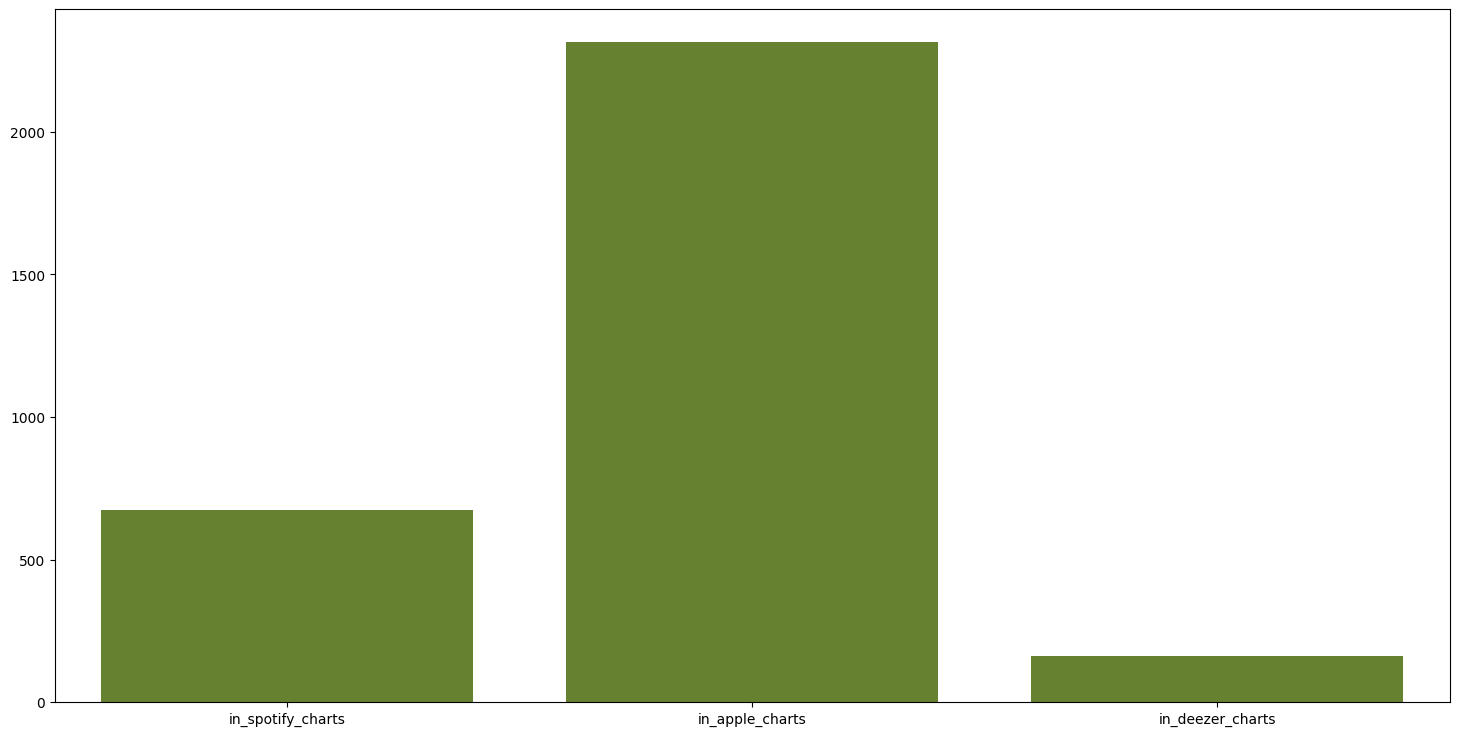

In [10]:
bad_bunny = sdata[sdata['artist(s)_name'].str.contains('Bad Bunny')].iloc[:, [7,10,12]].sum()
bad_bunny

seaborn.barplot(bad_bunny,color = 'olivedrab', width = 0.8, dodge=False)
#.set(title="Top 10 Most Streamed Tracks from the 90's in 2023", xlabel='Track Name', ylabel='Streams (Billion)')